### Evaluating customer conversion rate 
**This analysis looks at the success rate of a bank's campaign to sign in term-deposit clients. Using it to predict the likelihood of existing clients signing in to the product in the future**

In [41]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code"></form>''')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

<AxesSubplot:ylabel='deposit'>

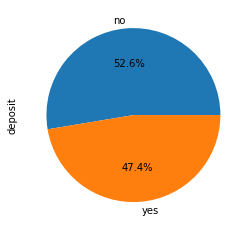

In [5]:
df['deposit'].value_counts(normalize=True).plot.pie(labels=['no','yes'],autopct='%1.1f%%')

In [13]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [14]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [17]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [18]:
df.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [19]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [6]:
df[df["poutcome"] == "success"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
899,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes
985,46,unemployed,divorced,secondary,no,3354,yes,no,cellular,19,nov,522,1,174,1,success,yes
994,40,management,married,tertiary,no,3352,yes,no,cellular,19,nov,639,2,27,1,success,yes
1151,31,management,married,tertiary,no,1331,no,no,cellular,3,feb,182,2,90,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,67,technician,married,secondary,no,0,no,no,cellular,13,aug,1152,2,188,1,success,no
10911,33,technician,married,secondary,no,348,yes,no,cellular,7,may,263,2,294,1,success,no
10918,36,entrepreneur,single,tertiary,no,145,yes,no,cellular,18,may,450,2,304,2,success,no
11069,33,self-employed,single,tertiary,no,658,yes,no,cellular,12,apr,93,1,173,2,success,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
type(df["month"])

pandas.core.series.Series

### Create dummy variables

In [8]:
job_dummies = pd.get_dummies(df["job"], prefix = "job = ")
df = pd.concat([df, job_dummies], axis=1)
df = df.drop("job", axis = 1)

marital_dummies = pd.get_dummies(df["marital"], prefix = "marital_status = ")
df = pd.concat([df, marital_dummies], axis=1)
df = df.drop("marital", axis = 1)

education_dummies = pd.get_dummies(df["education"], prefix = "education = ")
df = pd.concat([df, education_dummies], axis=1)
df = df.drop("education", axis = 1)

contact_dummies = pd.get_dummies(df["contact"], prefix = "contact = ")
df = pd.concat([df, contact_dummies], axis=1)
df = df.drop("contact", axis = 1)

poutcome_dummies = pd.get_dummies(df["poutcome"], prefix = "previous_outcome = ")
df = pd.concat([df, poutcome_dummies], axis=1)
df = df.drop("poutcome", axis = 1)
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education = _secondary,education = _tertiary,education = _unknown,contact = _cellular,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown
0,59,no,2343,yes,no,5,may,1042,1,-1,...,1,0,0,0,0,1,0,0,0,1
1,56,no,45,no,no,5,may,1467,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,41,no,1270,yes,no,5,may,1389,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,55,no,2476,yes,no,5,may,579,1,-1,...,1,0,0,0,0,1,0,0,0,1
4,54,no,184,no,no,5,may,673,2,-1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,no,1,yes,no,20,apr,257,1,-1,...,0,0,0,1,0,0,0,0,0,1
11158,39,no,733,no,no,16,jun,83,4,-1,...,1,0,0,0,0,1,0,0,0,1
11159,32,no,29,no,no,19,aug,156,2,-1,...,1,0,0,1,0,0,0,0,0,1
11160,43,no,0,no,yes,8,may,9,2,172,...,1,0,0,1,0,0,1,0,0,0


In [9]:
# transform default/housing/loan/deposit to 0 and 1

from sklearn.preprocessing import LabelEncoder

credit_default = LabelEncoder()
credit_default.fit(df["default"])

df["credit_default"] = credit_default.transform(df["default"])
df = df.drop("default", axis = 1)


house_loan = LabelEncoder()
house_loan.fit(df["housing"])

df["house_loan"] = house_loan.transform(df["housing"])
df = df.drop("housing", axis = 1)


personal_loan = LabelEncoder()
personal_loan.fit(df["loan"])

df["personal_loan"] = personal_loan.transform(df["loan"])
df = df.drop("loan", axis = 1)


term_deposit = LabelEncoder()
term_deposit.fit(df["deposit"])

df["term_deposit"] = term_deposit.transform(df["deposit"])
df = df.drop("deposit", axis = 1)
df

,age,balance,day,month,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,...,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit
0,59,2343,5,may,1042,1,-1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
1,56,45,5,may,1467,1,-1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,41,1270,5,may,1389,1,-1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
3,55,2476,5,may,579,1,-1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,54,184,5,may,673,2,-1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,apr,257,1,-1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
11158,39,733,16,jun,83,4,-1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11159,32,29,19,aug,156,2,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11160,43,0,8,may,9,2,172,5,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
month_dict = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

for idx, row in df.iterrows():
    month = row["month"]
    df.loc[idx, "month_v2"] = month_dict[month]

In [11]:
df["month_v2"] = df["month_v2"].astype(int)

In [12]:
df

,age,balance,day,month,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,...,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit,month_v2
0,59,2343,5,may,1042,1,-1,0,1,0,...,1,0,0,0,1,0,1,0,1,5
1,56,45,5,may,1467,1,-1,0,1,0,...,1,0,0,0,1,0,0,0,1,5
2,41,1270,5,may,1389,1,-1,0,0,0,...,1,0,0,0,1,0,1,0,1,5
3,55,2476,5,may,579,1,-1,0,0,0,...,1,0,0,0,1,0,1,0,1,5
4,54,184,5,may,673,2,-1,0,1,0,...,1,0,0,0,1,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,apr,257,1,-1,0,0,1,...,0,0,0,0,1,0,1,0,0,4
11158,39,733,16,jun,83,4,-1,0,0,0,...,1,0,0,0,1,0,0,0,0,6
11159,32,29,19,aug,156,2,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,8
11160,43,0,8,may,9,2,172,5,0,0,...,0,1,0,0,0,0,0,1,0,5


In [13]:
df = df.drop("month", axis = 1)
df

,age,balance,day,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,...,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit,month_v2
0,59,2343,5,1042,1,-1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,5
1,56,45,5,1467,1,-1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,5
2,41,1270,5,1389,1,-1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,5
3,55,2476,5,579,1,-1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,5
4,54,184,5,673,2,-1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,4
11158,39,733,16,83,4,-1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,6
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8
11160,43,0,8,9,2,172,5,0,0,0,...,0,1,0,0,0,0,0,1,0,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          11162 non-null  int64
 1   balance                      11162 non-null  int64
 2   day                          11162 non-null  int64
 3   duration                     11162 non-null  int64
 4   campaign                     11162 non-null  int64
 5   pdays                        11162 non-null  int64
 6   previous                     11162 non-null  int64
 7   job = _admin.                11162 non-null  uint8
 8   job = _blue-collar           11162 non-null  uint8
 9   job = _entrepreneur          11162 non-null  uint8
 10  job = _housemaid             11162 non-null  uint8
 11  job = _management            11162 non-null  uint8
 12  job = _retired               11162 non-null  uint8
 13  job = _self-employed         11162 non-null  u

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,...,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit,month_v2
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.119513,0.174162,0.029385,...,0.210177,0.110016,0.048110,0.095951,0.745924,0.015051,0.473123,0.130801,0.473840,6.190826
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.324405,0.379266,0.168892,...,0.407453,0.312924,0.214008,0.294537,0.435360,0.121761,0.499299,0.337198,0.499338,2.572792
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [16]:
corrMatrix = df.corr()
corrMatrix

,age,balance,day,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,...,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,term_deposit,month_v2
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,-0.057458,-0.066567,0.024176,...,-0.037860,-0.008071,-0.018715,0.062114,-0.027021,-0.011425,-0.168700,-0.031418,0.034901,0.069312
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,-0.038001,-0.046220,0.005039,...,-0.046237,0.001695,0.028521,0.045603,-0.046091,-0.060954,-0.077092,-0.084589,0.081129,0.063818
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.013901,-0.023039,-0.004463,...,0.003401,-0.068381,-0.007526,-0.044280,0.082807,0.017342,-0.014770,0.017269,-0.056326,0.060431
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,-0.025542,0.029986,-0.000908,...,-0.013107,-0.033966,-0.008782,-0.022578,0.044006,-0.009760,0.035051,-0.001914,0.451919,0.005390
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.017881,0.005522,0.013883,...,0.045016,-0.080188,-0.023689,-0.091807,0.131392,0.030975,0.006660,0.034722,-0.128081,0.039251
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.044068,-0.030695,-0.029732,...,-0.230944,0.602615,0.341404,0.329567,-0.823928,-0.036282,0.064497,-0.030416,0.151593,-0.035375
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.022699,-0.039939,-0.022470,...,-0.178947,0.335870,0.326587,0.325477,-0.622149,-0.035273,-0.000840,-0.022668,0.139867,-0.002695
job = _admin.,-0.057458,-0.038001,-0.013901,-0.025542,-0.017881,0.044068,0.022699,1.000000,-0.169190,-0.064104,...,-0.001611,0.033750,0.007513,0.005628,-0.031759,-0.020592,0.060213,0.050383,-0.000610,-0.025824
job = _blue-collar,-0.066567,-0.046220,-0.023039,0.029986,0.005522,-0.030695,-0.039939,-0.169190,1.000000,-0.079905,...,0.162004,-0.018022,-0.002788,-0.077422,0.066703,0.022779,0.189848,0.057956,-0.100840,-0.062436
job = _entrepreneur,0.024176,0.005039,-0.004463,-0.000908,0.013883,-0.029732,-0.022470,-0.064104,-0.079905,1.000000,...,0.018308,-0.001840,-0.024244,-0.035072,0.036967,0.022060,0.011492,0.042631,-0.034443,0.031426


**High correlation between term deposit and duration of call (0.451919)**
- Followed by previous_outcome = success (0.286642)
- Followed by contact = cellular (0.223252)
- Followed by pdays (0.151593)
- Followed by previous (0.139867)


In [17]:
corrMatx = df[["previous", "pdays", "term_deposit", "contact = _cellular", "previous_outcome = _success", "duration"]].corr()
corrMatx

,previous,pdays,term_deposit,contact = _cellular,previous_outcome = _success,duration
previous,1.000000,0.507272,0.139867,0.147519,0.325477,-0.026716
pdays,0.507272,1.000000,0.151593,0.205877,0.329567,-0.027392
term_deposit,0.139867,0.151593,1.000000,0.223252,0.286642,0.451919
contact = _cellular,0.147519,0.205877,0.223252,1.000000,0.141237,0.020938
previous_outcome = _success,0.325477,0.329567,0.286642,0.141237,1.000000,-0.022578
duration,-0.026716,-0.027392,0.451919,0.020938,-0.022578,1.000000


<AxesSubplot:>

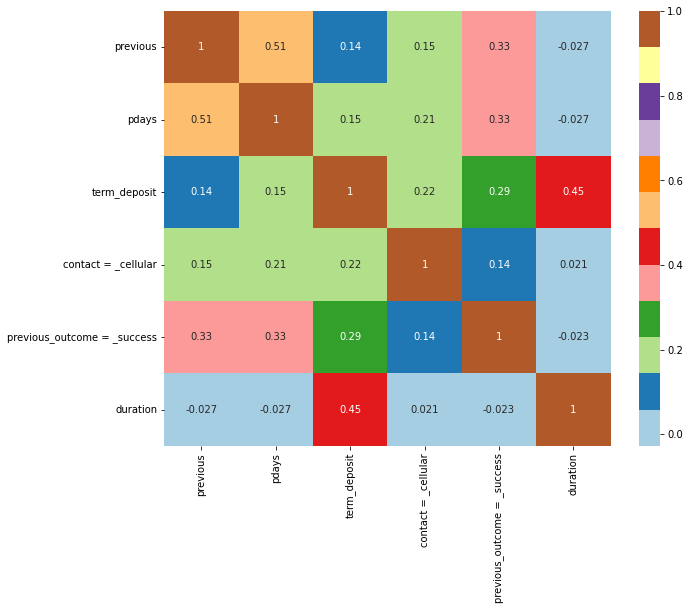

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corrMatx, annot = True, cmap= 'Paired')

**Histplot comparing the various education levels + job types to the conversion possibility**
- checking if these variables affect term_deposit

In [ ]:
### how do i create a histogram to compare these???


#lending_club['loan_amnt'].hist() (example code)

plt.figure(figsize = (10, 8))
sns.histplot(data = df, x = "term_deposit", bins = 20)


<AxesSubplot:xlabel='term_deposit', ylabel='education = _secondary'>

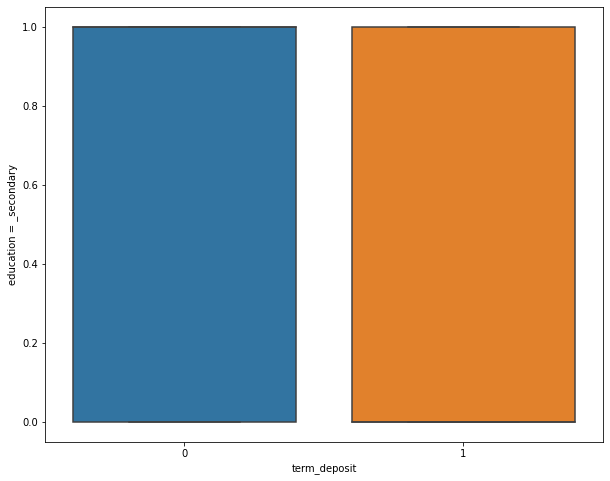

In [72]:
plt.figure(figsize = (10, 8))
sns.boxplot(x=df["term_deposit"], y=df["education = _secondary"])

<AxesSubplot:xlabel='term_deposit', ylabel='age'>

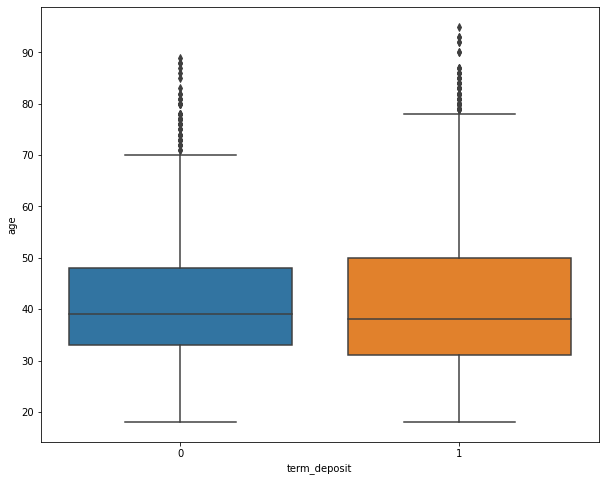

In [67]:
plt.figure(figsize = (10, 8))
sns.boxplot(x=df["term_deposit"], y=df["age"])

<AxesSubplot:xlabel='term_deposit', ylabel='duration'>

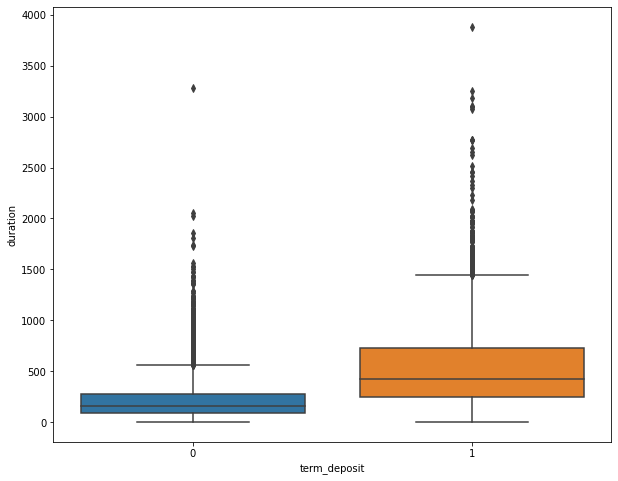

In [63]:
plt.figure(figsize = (10, 8))
sns.boxplot(x=df["term_deposit"], y=df["duration"])

 ### Train_test split

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop("term_deposit", axis = 1)
y = df["term_deposit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,...,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,month_v2
3955,28,5741,10,1042,5,200,3,0,0,0,...,0,0,1,0,0,0,0,0,0,9
11150,34,355,21,314,3,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8
5173,48,201,10,594,1,91,1,0,0,0,...,0,0,0,0,1,0,0,0,0,11
3017,53,1961,15,351,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,12
2910,53,1624,11,166,3,97,7,0,0,0,...,0,0,0,0,1,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,761,11,80,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,7
5191,28,159,16,449,2,33,4,0,0,0,...,0,0,0,0,1,0,0,0,0,11
5390,35,1144,20,197,13,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8
860,51,746,25,372,5,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8


In [21]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job = _admin.,job = _blue-collar,job = _entrepreneur,...,contact = _telephone,contact = _unknown,previous_outcome = _failure,previous_outcome = _other,previous_outcome = _success,previous_outcome = _unknown,credit_default,house_loan,personal_loan,month_v2
5527,65,744,5,182,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
4541,38,1627,16,1323,9,-1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,6
1964,35,4963,14,456,1,300,1,0,1,0,...,0,0,1,0,0,0,0,1,0,5
5007,47,8229,8,784,2,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,8
8928,35,1473,12,84,3,-1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,46,926,7,385,5,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
5544,49,230,8,96,1,-1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,5
10749,53,431,5,55,1,328,1,0,0,0,...,0,0,1,0,0,0,0,1,0,5
3881,48,926,12,504,2,178,10,0,0,0,...,0,0,0,0,1,0,0,0,0,8


### Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=15000)
LR

LogisticRegression(max_iter=15000)

In [23]:
LR.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

In [24]:
proba_pred = LR.predict_proba(X_test)
proba_pred

array([[0.48186663, 0.51813337],
       [0.05042143, 0.94957857],
       [0.33689736, 0.66310264],
       ...,
       [0.77389948, 0.22610052],
       [0.03431049, 0.96568951],
       [0.77793325, 0.22206675]])

In [25]:
proba_df = pd.DataFrame(proba_pred)
proba_df

,0,1
0,0.481867,0.518133
1,0.050421,0.949579
2,0.336897,0.663103
3,0.082361,0.917639
4,0.954977,0.045023
...,...,...
2228,0.498049,0.501951
2229,0.965702,0.034298
2230,0.773899,0.226101
2231,0.034310,0.965690


In [26]:
pred = LR.predict(X_test)
pred

array([1, 1, 1, ..., 0, 1, 0])

In [27]:
predictions = pd.DataFrame(pred)
predictions.head()

,0
0,1
1,1
2,1
3,1
4,0


### Evaluation metrics

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, pred))

# Precision
print("Precision:", precision_score(y_test, pred))

# Recall
print("Recall:", recall_score(y_test, pred))

# F1
print("F1:", f1_score(y_test, pred))


Accuracy: 0.7944469323779668
Precision: 0.8064516129032258
Recall: 0.7497656982193065
F1: 0.7770762506070908


In [35]:
from sklearn.metrics import confusion_matrix

print("LRconfusion_matrix:", confusion_matrix(y_test, pred))

LRconfusion_matrix: [[974 192]
 [267 800]]


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
RF_pred = RF.predict(X_test)
RF_pred

array([1, 1, 0, ..., 0, 1, 0])

In [32]:
rf_predictions = pd.DataFrame(RF_pred)
rf_predictions

,0
0,1
1,1
2,0
3,1
4,0
...,...
2228,1
2229,0
2230,0
2231,1


In [33]:
# Accuracy
print("rf_Accuracy:", accuracy_score(y_test, RF_pred))

# Precision
print("rf_Precision:", precision_score(y_test, RF_pred))

# Recall
print("rf_Recall:", recall_score(y_test, RF_pred))

# F1
print("rf_F1:", f1_score(y_test, RF_pred))

rf_Accuracy: 0.8338557993730408
rf_Precision: 0.8123877917414721
rf_Recall: 0.8481724461105904
rf_F1: 0.8298945437872535


In [34]:
print("RFconfusion_matrix:", confusion_matrix(y_test, RF_pred))

RFconfusion_matrix: [[957 209]
 [162 905]]


### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
DT_pred = DT.predict(X_test)
DT_pred

array([0, 1, 1, ..., 0, 1, 0])

In [38]:
dt_predictions = pd.DataFrame(DT_pred)
dt_predictions

,0
0,0
1,1
2,1
3,1
4,0
...,...
2228,1
2229,0
2230,0
2231,1


In [39]:
# Accuracy
print("dt_Accuracy:", accuracy_score(y_test, DT_pred))

# Precision
print("dt_Precision:", precision_score(y_test, DT_pred))

# Recall
print("dt_Recall:", recall_score(y_test, DT_pred))

# F1
print("dt_F1:", f1_score(y_test, DT_pred))

dt_Accuracy: 0.7796686072548141
dt_Precision: 0.7826941986234022
dt_Recall: 0.7460168697282099
dt_F1: 0.763915547024952


In [40]:
print("DTconfusion_matrix:", confusion_matrix(y_test, DT_pred))

DTconfusion_matrix: [[945 221]
 [271 796]]


In [57]:
#from sklearn import tree

#DT = DecisionTreeClassifier(max_depth = 4)
#DT.fit(X_train, y_train)
#DT_pred = DT.predict(X_test)

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8), dpi = 250)

#tree.plot_tree(DT, feature_names = X_train.columns, class_names = ["yes", "no"], filled = True, fontsize = 5.5)

#plt.show()

### Which Algorithm is better?

Random forest shows better performance compared to Logistic regression and Decision tree